In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [26]:
df = pd.read_csv('../03_Classification/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [27]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [28]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = [c for c in df_train.columns if c not in numerical]

In [29]:
numerical

['tenure', 'monthlycharges', 'totalcharges']

In [30]:
categorical

['customerid',
 'gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod']

In [31]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

c:\anaconda3\envs\3.11.13\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.7984386089425124)

### 4.2 - Accuracy and Dummy Model

In [33]:
len(y_val)

1409

In [34]:
(y_val == churn_decision).sum()

np.int64(1125)

In [35]:
1125 / 1409 

0.7984386089425124

In [37]:
accuracy = (y_val == churn_decision).mean()
accuracy

np.float64(0.7984386089425124)

In [43]:
threadsholds = np.linspace(0, 1, 21)
accuracy_scores = []

for t in threadsholds:
    churn_decision = (y_pred >= t)
    accuracy = (y_val == churn_decision).mean()
    accuracy_scores.append(accuracy)

    print('%.2f %.3f' % (t, accuracy))

0.00 0.274
0.05 0.512
0.10 0.600
0.15 0.669
0.20 0.708
0.25 0.733
0.30 0.755
0.35 0.769
0.40 0.783
0.45 0.796
0.50 0.798
0.55 0.802
0.60 0.796
0.65 0.788
0.70 0.764
0.75 0.747
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


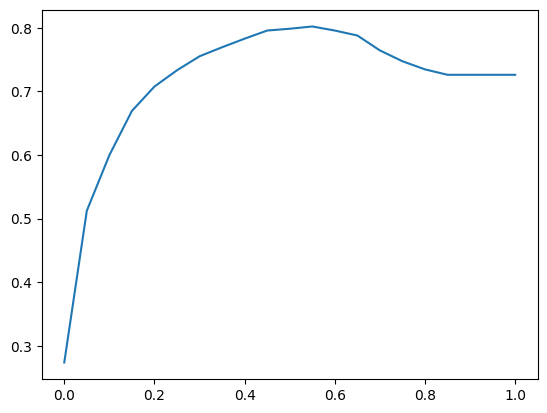

In [41]:
plt.plot(threadsholds, accuracy_scores)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
threadsholds = np.linspace(0, 1, 21)
accuracy_scores = []

for t in threadsholds:
    accuracy = accuracy_score(y_val, y_pred >= t)
    accuracy_scores.append(accuracy)

    print('%.2f %.3f' % (t, accuracy))

0.00 0.274
0.05 0.512
0.10 0.600
0.15 0.669
0.20 0.708
0.25 0.733
0.30 0.755
0.35 0.769
0.40 0.783
0.45 0.796
0.50 0.798
0.55 0.802
0.60 0.796
0.65 0.788
0.70 0.764
0.75 0.747
0.80 0.735
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


In [47]:
from collections import Counter

In [49]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [50]:
1 - y_val.mean()

np.float64(0.7260468417317246)

### 4.3 - Confusion Table

In [51]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [58]:
t = 0.5
predicted_positive = (y_pred >= t)
predicted_negative = (y_pred < t)

In [59]:
tp = (predicted_positive & actual_positive).sum()
tn = (predicted_negative & actual_negative).sum()

fp = (predicted_positive & actual_negative).sum()
fn = (predicted_negative & actual_positive).sum()

In [60]:
confusion_matrix = np.array([
  [tn, fp], 
  [fn, tp]
])

confusion_matrix

array([[914, 109],
       [175, 211]])

In [64]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

### accuracy = 80 % = 65% tn + 15% tp